In [2]:
# import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
atlas = nib.load('/home/nidhiramesh/CT_Project/vasc_terr_r.nii.gz')
#get voxel spacing of this patient. first goes spacing along x, then along y, then along z

ModuleNotFoundError: No module named 'pandas'

In [22]:
header = atlas.header
#print(header)      

(207, 256, 26)

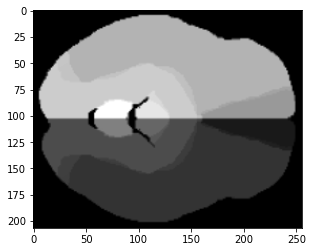

In [23]:
atlas = atlas.get_fdata()

import matplotlib.pyplot as plt
plt.imshow(atlas[:, :, 10], cmap='gray')

atlas.shape

In [24]:
table = np.unique(atlas.astype(int))
print(table)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [25]:
tmp = np.zeros((207,256,26))
#labels = np.unique(label_terr)

for x in table:
    tmp[atlas==x]=1
    

In [26]:
print(tmp)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


Whole_Brain


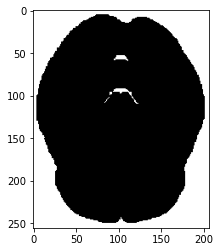

R_ACA


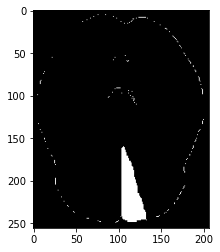

R_MCA


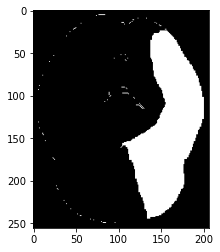

R_PCA


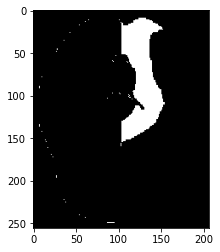

R_ICA


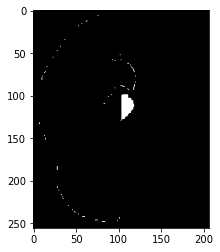

R_PICA


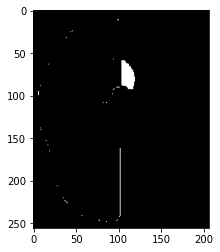

L_ACA


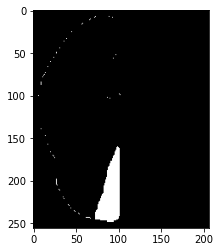

L_MCA


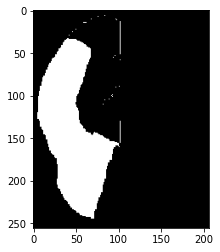

L_PCA


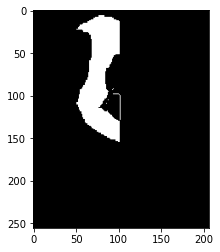

L_ICA


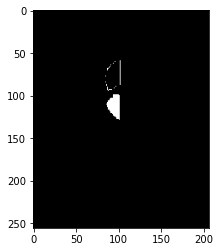

L_PICA


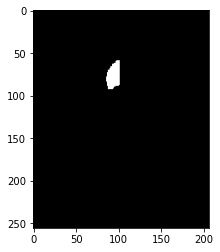

In [44]:
#mask_file = nib.load(os.path.join(self.training_path, "vasc_terr_r.nii.gz"))
atlas = nib.load('/home/nidhiramesh/CT_Project/vasc_terr_r.nii.gz')
atlas = atlas.get_fdata().astype(int) / 2

label_terr = ['Whole_Brain',
              'R_ACA',
              'R_MCA',
              'R_PCA',
              'R_ICA',
              'R_PICA',
              'L_ACA',
              'L_MCA',
              'L_PCA',
              'L_ICA',
              'L_PICA', ]

ind = "R_MCA"

#for l in label_terr:


for l in label_terr:
    ind = l
    print(ind)
    mask = np.zeros(atlas.T.shape)
    mask += atlas.T == label_terr.index(ind)
    plt.imshow(mask[10,:,:], cmap='gray')
    plt.show()

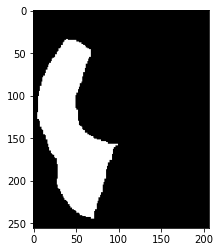

In [77]:
plt.imshow(mask[10,:,:], cmap='gray')

In [46]:
df = pd.read_csv('/home/nidhiramesh/CT_Project/data_sheets/MTB_CT_Patients.csv')
df.head()
location = df['Location'].tolist()
side = df['Side'].tolist()

atlas = atlas / 2
label_terr = ['B_PICA','B_PCA','R_ICA ',
                              'R_ACA',
                              'R_MCA',
                              'R_PCA',
                              'R_ICA',
                              'R_PICA',
                              'L_ACA',
                              'L_MCA',
                              'L_PCA',
                              'L_ICA',
                              'L_PICA', ]


In [47]:
mask = np.zeros(atlas.T.shape)
#location = location.split('/')
for x in location:
    if x.startswith('M'):
        x = 'MCA'
    elif x.startswith('PI'):
        x = 'PICA'
    elif x.startswith('P'):
        x = 'PCA'
    elif x.startswith('C'):
        x = 'ICA'
    index = side[location.index(x)] + "_" + x
    mask += atlas.T == label_terr.index(index)

In [48]:
print(mask)

[[[2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  ...
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]]

 [[2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  ...
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]]

 [[2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  ...
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]]

 ...

 [[2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  ...
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]]

 [[2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  ...
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]]

 [[2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  ...
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]]]


In [44]:
from scipy.ndimage import binary_dilation, zoom
# dilate the mask
kernel = np.ones((3, 3, 3), np.uint8)
img_dil = binary_dilation(mask, kernel, iterations=2)

# multiply the mask
#series_array = series_array * img_dil

In [25]:
img1 = nib.load('/home/nidhiramesh/CT_Project/patient_images/280019/CTA_Brain-Neck_1.0_H30f_stripped.nii.gz')

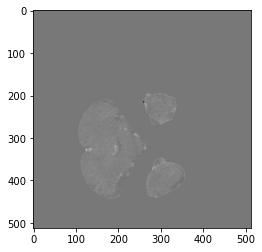

In [28]:
img1 = img1.get_fdata()

import matplotlib.pyplot as plt
plt.imshow(img1[:, :, 100], cmap='gray')

In [7]:
img2 = nib.load('/home/nidhiramesh/CT_Project/patient_images/280019/CTA_Brain-Neck_1.0_H30f_stripped.nii.gz')

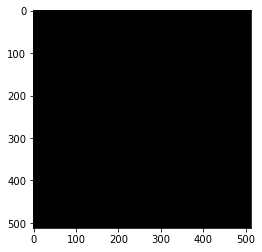

In [8]:
img2 = img2.get_fdata()

import matplotlib.pyplot as plt
plt.imshow(img2[:, :, 10], cmap='gray')

In [18]:

#254 rows x 13 columns

,PT_ID,Sex,Age,Side,Location,NIHSS,TICI,AOL,Pulls,Label_mTICI_2c+,Label_FPE_2c,Label_mTICI_2b+,Label_FPE_2b
0,280019,m,67,R,MCA,11,3,3,4,1,0,1,0
1,280021,m,66,R,MCA,10,0,0,3,0,0,0,0
2,280022,f,73,R,ICA,23,2b,3,3,0,0,1,0
3,280025,f,83,L,ICA,19,2b,3,2,0,0,1,0
4,280037,m,59,B,PICA,32,3,3,1,1,1,1,1
